<a href="https://colab.research.google.com/github/chahatpatel2003/CSCI-167/blob/main/notebook_6_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

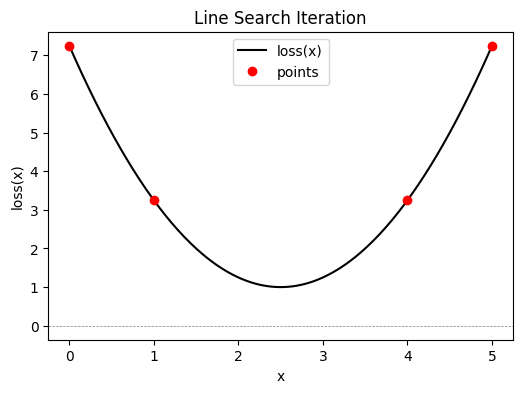

Iter  0, a=0.000, b=1.000, c=4.000, d=5.000


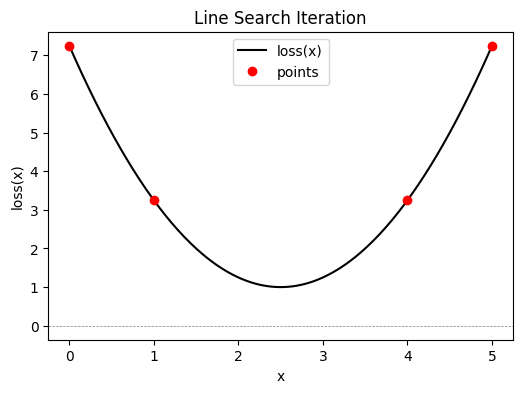

Iter  1, a=0.000, b=1.000, c=4.000, d=5.000


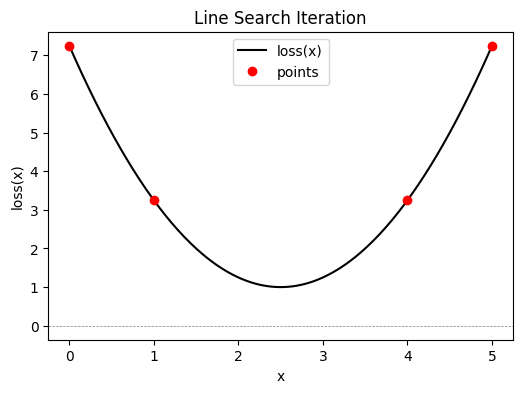

Iter  2, a=0.000, b=1.000, c=4.000, d=5.000


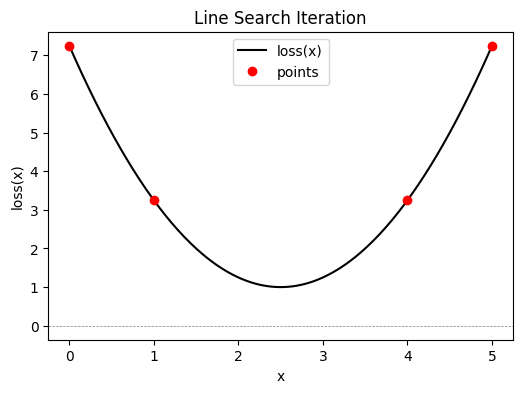

Iter  3, a=0.000, b=1.000, c=4.000, d=5.000


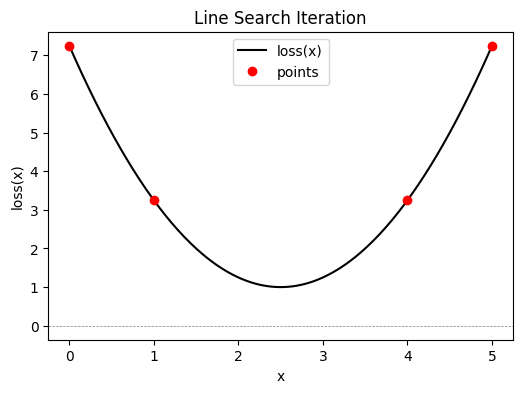

Iter  4, a=0.000, b=1.000, c=4.000, d=5.000


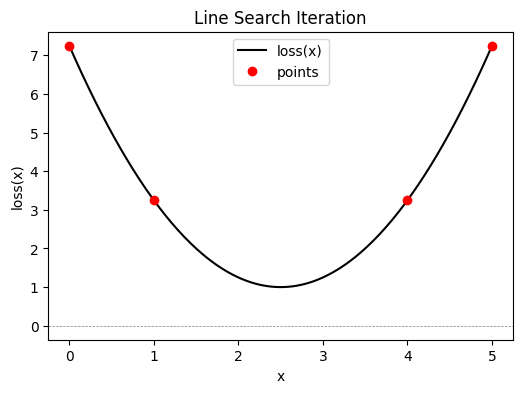

Iter  5, a=0.000, b=1.000, c=4.000, d=5.000


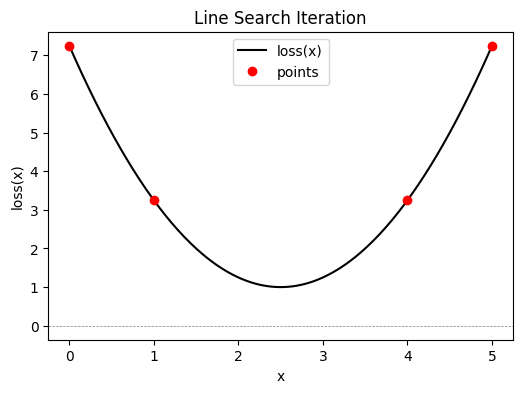

Iter  6, a=0.000, b=1.000, c=4.000, d=5.000


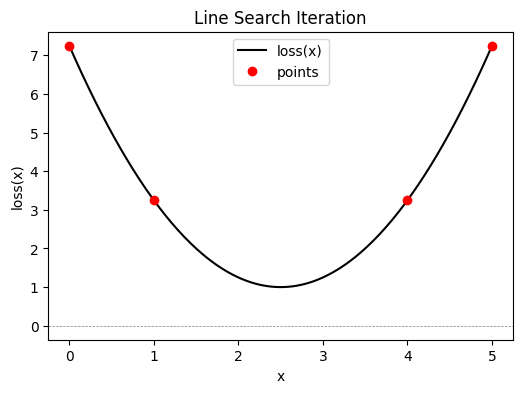

Iter  7, a=0.000, b=1.000, c=4.000, d=5.000


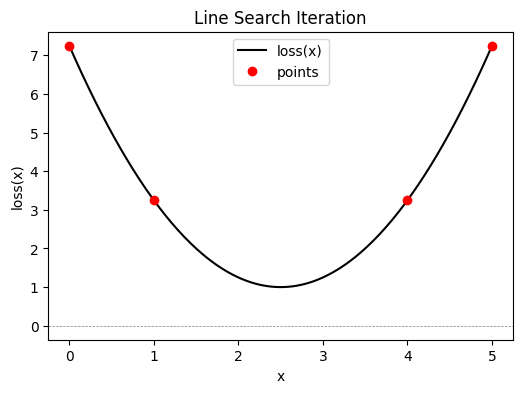

Iter  8, a=0.000, b=1.000, c=4.000, d=5.000


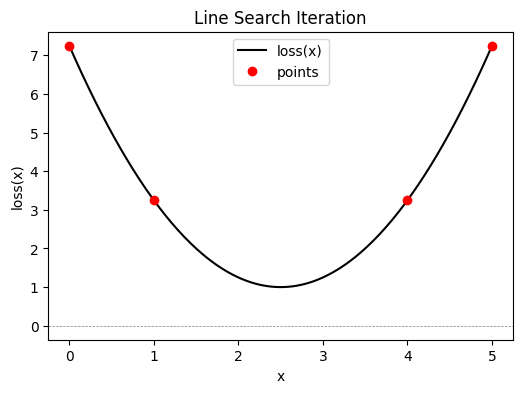

Iter  9, a=0.000, b=1.000, c=4.000, d=5.000


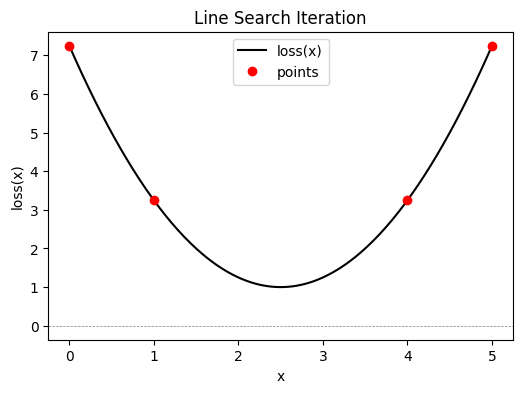

Iter 10, a=0.000, b=1.000, c=4.000, d=5.000


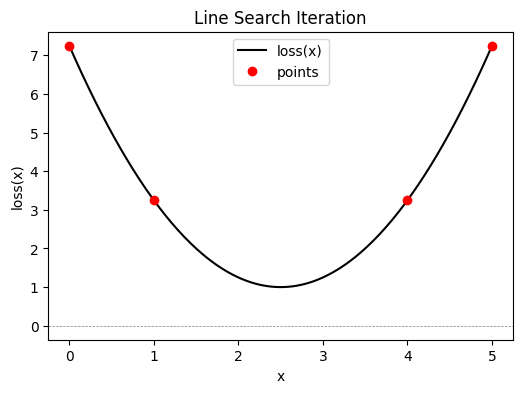

Iter 11, a=0.000, b=1.000, c=4.000, d=5.000


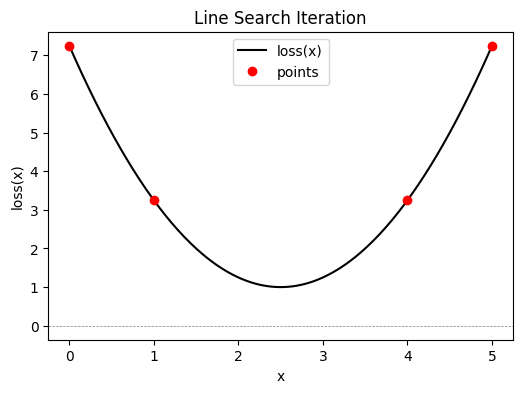

Iter 12, a=0.000, b=1.000, c=4.000, d=5.000


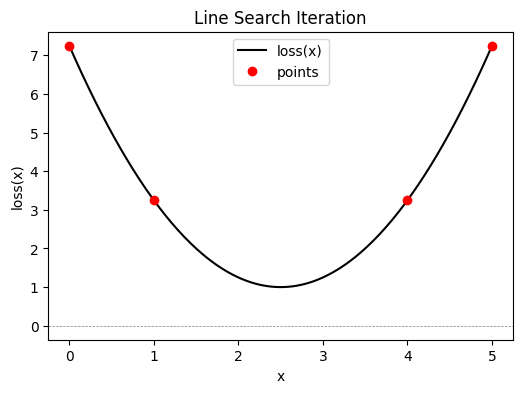

Iter 13, a=0.000, b=1.000, c=4.000, d=5.000


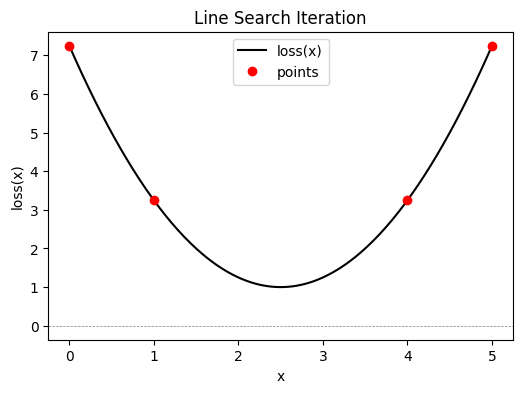

Iter 14, a=0.000, b=1.000, c=4.000, d=5.000


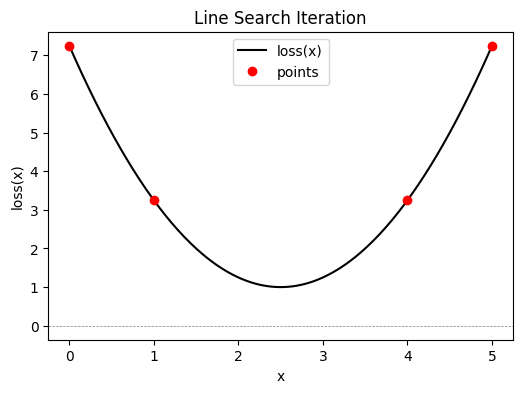

Iter 15, a=0.000, b=1.000, c=4.000, d=5.000


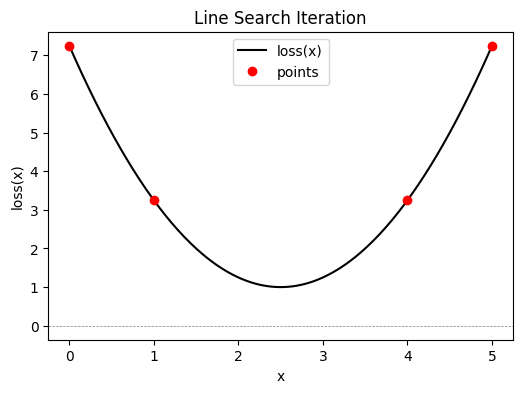

Iter 16, a=0.000, b=1.000, c=4.000, d=5.000


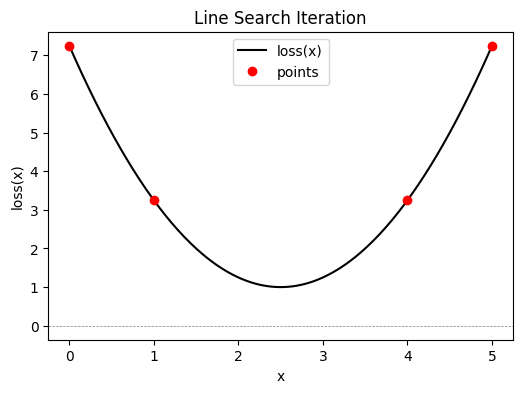

Iter 17, a=0.000, b=1.000, c=4.000, d=5.000


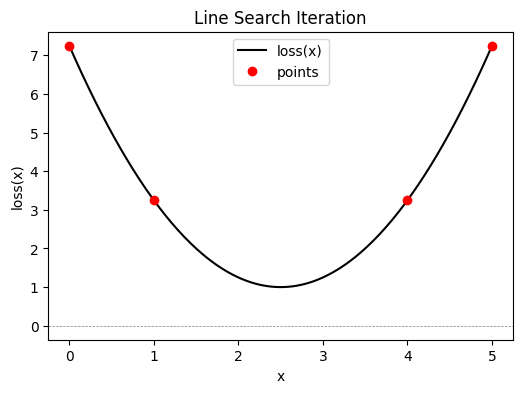

Iter 18, a=0.000, b=1.000, c=4.000, d=5.000


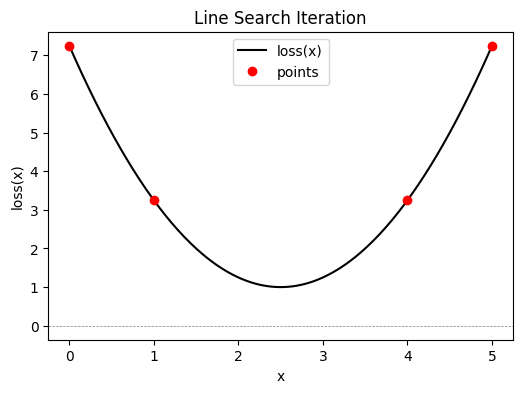

Iter 19, a=0.000, b=1.000, c=4.000, d=5.000
Soln = 2.500, loss = 1.000


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Loss function (parabola example)
def loss_function(x):
    # Simple quadratic loss
    return (x - 2.5)**2 + 1

# Drawing function for visualization
def draw_function(loss_function, a, b, c, d):
    xs = np.linspace(0, 5, 200)
    ys = loss_function(xs)
    plt.figure(figsize=(6,4))
    plt.plot(xs, ys, 'k-', label='loss(x)')
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

    plt.plot([a, b, c, d],
             [loss_function(a), loss_function(b), loss_function(c), loss_function(d)],
             'ro', label='points')

    plt.legend()
    plt.xlabel('x')
    plt.ylabel('loss(x)')
    plt.title('Line Search Iteration')
    plt.show()

def line_search(loss_function, draw_flag=False):
    # Initial bracket points
    a = 0.0
    b = 1.0
    c = 4.0
    d = 5.0

    max_iter = 20
    for n_iter in range(max_iter):
        # Compute loss at each point
        lossa = loss_function(a)
        lossb = loss_function(b)
        lossc = loss_function(c)
        lossd = loss_function(d)

        if draw_flag:
            draw_function(loss_function, a, b, c, d)

        print(f"Iter {n_iter:2d}, a={a:3.3f}, b={b:3.3f}, c={c:3.3f}, d={d:3.3f}")

        # ----------------------------
        # Rule #1
        # If the HEIGHT at point A is less than the HEIGHT at points B, C, and D
        # move them to be half as far from A as they started.
        if lossa < lossb and lossa < lossc and lossa < lossd:
            # Move b, c, d halfway closer to a
            b = (a + b) / 2.0
            c = (a + c) / 2.0
            d = (a + d) / 2.0
            continue

        # ----------------------------
        # Rule #2
        # If HEIGHT at b is less than HEIGHT at c
        #    point d becomes point c
        #    point b becomes 1/3 between a and new d
        #    point c becomes 2/3 between a and new d
        if lossb < lossc:
            d = c
            b = a + (d - a) / 3.0
            c = a + 2.0 * (d - a) / 3.0
            continue

        # ----------------------------
        # Rule #3
        # If HEIGHT at c is less than HEIGHT at b
        #    point a becomes point b
        #    point b becomes 1/3 between new a and d
        #    point c becomes 2/3 between new a and d
        if lossc < lossb:
            a = b
            b = a + (d - a) / 3.0
            c = a + 2.0 * (d - a) / 3.0
            continue

    # ------------------------------------
    # Final solution is average of b and c
    soln = (b + c) / 2.0
    return soln


# Run line search
soln = line_search(loss_function, draw_flag=True)
print(f"Soln = {soln:3.3f}, loss = {loss_function(soln):3.3f}")
